<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Lets download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-01-13 19:08:36--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2021-01-13 19:08:37 (146 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set 


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:


In [7]:
# notice: installing seaborn might takes a few minutes
# !conda install -c anaconda seaborn -y

In [8]:
# import seaborn as sns

# bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
# g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
# g.map(plt.hist, 'Principal', bins=bins, ec="k")

# g.axes[-1].legend()
# plt.show()

In [9]:
# bins = np.linspace(df.age.min(), df.age.max(), 10)
# g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
# g.map(plt.hist, 'age', bins=bins, ec="k")

# g.axes[-1].legend()
# plt.show()

# Pre-processing:  Feature selection/extraction


### Lets look at the day of the week people get the loan


In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
# bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
# g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
# g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
# g.axes[-1].legend()
# plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 


In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Lets look at gender:


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding


In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection


Lets defind feature sets, X:


In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [18]:
# To get numerical instead of categorical. Not necessary though.
# y = pd.Series(df['loan_status'], dtype="category").cat.codes.values

y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split )


In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

-   K Nearest Neighbor(KNN)
-   Decision Tree
-   Support Vector Machine
-   Logistic Regression

** Notice:** 

-   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
-   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
-   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


### Comments:

*test_size* parameter has an impact in final accuracy, as well as *the random_state*.
However, smaller *test_size* than 0.2 is not recommended as it probably overfits the model, despite the better final accuracy (0.82).

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range (1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_hat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)
    std_acc[n-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286, 0.67142857])

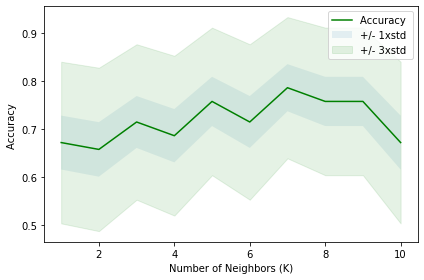

In [22]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [23]:
print( "The best accuracy for KNN was", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy for KNN was 0.7857142857142857 with k= 7


In [24]:
# Best K found to be 7. Train the final model with the optimal hyperparameters.

final_knn_model = KNeighborsClassifier(n_neighbors = 7)
final_knn_model.fit(X_train,y_train)

y_hat = final_knn_model.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, final_knn_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Train set Accuracy:  0.8079710144927537
Test set Accuracy:  0.7857142857142857


# Decision Tree


In [25]:
from sklearn.tree import DecisionTreeClassifier

max_depth = 11
mean_acc = np.zeros((max_depth-1))
std_acc = np.zeros((max_depth-1))

# Grid-search over max_depth hyperparameter
for depth in range (1, max_depth):
    
    #Train Model and Predict
    clsTree = DecisionTreeClassifier(criterion="entropy", max_depth = depth)
    clsTree.fit(X_train,y_train)
    y_hat = clsTree.predict(X_test)
    mean_acc[depth-1] = metrics.accuracy_score(y_test, y_hat)
    std_acc[depth-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

mean_acc

array([0.78571429, 0.78571429, 0.61428571, 0.61428571, 0.64285714,
       0.77142857, 0.75714286, 0.75714286, 0.65714286, 0.7       ])

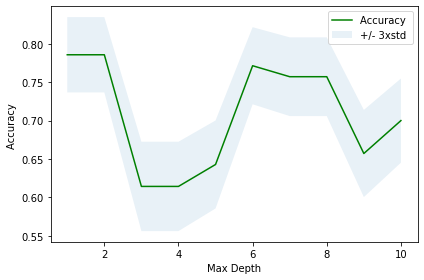

In [26]:
plt.plot(range(1, max_depth), mean_acc, 'g')
plt.fill_between(range(1, max_depth), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Max Depth')
plt.tight_layout()
plt.show()

### Comments:

Analyzing the plot, we can see that for **max_depth=2** we achieve the best accuracy. However, defining a rather small value like max_depth=2 makes the DecisionTree not to be quite robust, as it will not be able to learn more complex patterns in data. Likewise, with larger values the model will probably overfit. The best value for the max_depth can be found after the the extreme curve in plot, which in our case is **max_depth=6**.
More info: https://www.kdnuggets.com/2019/08/understanding-decision-trees-classification-python.html

In [27]:
# <!> NOTE: Better ommit visualization, !conda install will probably hang the kernel <!>

# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
# !conda install -c conda-forge pydotplus -y
# !conda install -c conda-forge python-graphviz -y

# Maybe its better to try with pip
# !pip install graphviz
# !pip install pydotplus

# from  io import StringIO
# import pydotplus
# import matplotlib.image as mpimg
# from sklearn import tree

# dot_data = StringIO()
# filename = "class_tree.png"
# featureNames = Feature.columns
# out=tree.export_graphviz(class_tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png(filename)
# img = mpimg.imread(filename)
# plt.figure(figsize=(100, 200))
# plt.imshow(img,interpolation='nearest')

In [28]:
# Best max_depth found to be 6. Train the final model with the optimal hyperparameters.

final_tree_model = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
final_tree_model.fit(X_train,y_train)

y_hat = final_tree_model.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, final_tree_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Train set Accuracy:  0.7753623188405797
Test set Accuracy:  0.7714285714285715


# Support Vector Machine


In [29]:
import scipy.optimize as opt
from sklearn import svm
from sklearn.metrics import f1_score, jaccard_score

mean_acc = {}

# Grid-search over kernel hyperparameter
for kernel in ['linear', 'rbf', 'sigmoid', 'poly']:
    
    #Train Model and Predict
    clf = svm.SVC(kernel=kernel, C=0.75)
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    mean_acc[kernel] = metrics.accuracy_score(y_test, y_hat)

mean_acc

{'linear': 0.7857142857142857,
 'rbf': 0.7857142857142857,
 'sigmoid': 0.7285714285714285,
 'poly': 0.7714285714285715}

In [30]:
# Best kernel found to be 'rbf'. Train the final model with the optimal hyperparameters.

final_svm_model = svm.SVC(kernel='rbf')
final_svm_model.fit(X_train, y_train)

y_hat = final_svm_model.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, final_tree_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))
# jaccard_score(y_test, y_hat, pos_label='PAIDOFF')

Train set Accuracy:  0.7753623188405797
Test set Accuracy:  0.7428571428571429


# Logistic Regression


In [31]:
import scipy.optimize as opt
from sklearn.linear_model import LogisticRegression

mean_acc = {}

# Grid-search over kernel and C (regularazitaion) hyperparameters
for slvr in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
#     for c in [1.0, 0.5, 0.3, 0.1, 0.01]:
    for c in [0.01]:
    
        #Train Model and Predict
        lr_clf = LogisticRegression(C=c, solver=slvr)
        lr_clf.fit(X_train, y_train)
        y_hat = lr_clf.predict(X_test)
        mean_acc[slvr + '-' + str(c)] = metrics.accuracy_score(y_test, y_hat)

dict(sorted(mean_acc.items(), key=lambda item: item[1], reverse=True))

{'newton-cg-0.01': 0.7857142857142857,
 'lbfgs-0.01': 0.7857142857142857,
 'sag-0.01': 0.7857142857142857,
 'saga-0.01': 0.7857142857142857,
 'liblinear-0.01': 0.6857142857142857}

### Comment:

Most solvers achieved the same score. More training data would help to decide about the best one, however we perform the final tests with the "newton-cg" solver.

In [32]:
# Best hyperparameters found to be 'newton-cg' with C=0.01. Train the final model with the optimal hyperparameters.

final_regr_model = LogisticRegression(C=0.01, solver='newton-cg')
final_regr_model.fit(X_train, y_train)

y_hat = final_regr_model.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, final_regr_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Train set Accuracy:  0.7427536231884058
Test set Accuracy:  0.7857142857142857


# Model Evaluation using Test set


In [33]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:


In [34]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-01-13 19:08:42--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-01-13 19:08:43 (57.3 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [35]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [36]:
# Prepare test data like we did with train/test previously

test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

test_df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.groupby(['education'])['loan_status'].value_counts(normalize=True)

Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

X_test = Feature
y_test = test_df['loan_status'].values
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

In [37]:
# Compute the scores using the final (best) trained models

# Final KNN model
y_hat_knn = final_knn_model.predict(X_test)
knn_f1 = f1_score(y_test, y_hat_knn, average='weighted') 
knn_jac = jaccard_score(y_test, y_hat_knn, pos_label='PAIDOFF')

print('KNN: F1 score: ', knn_f1)
print('KNN: Jaccard score: ', knn_jac)

# Final DecisionTree model
y_hat_tree = final_tree_model.predict(X_test)
tree_f1 = f1_score(y_test, y_hat_tree, average='weighted')
tree_jac = jaccard_score(y_test, y_hat_tree, pos_label='PAIDOFF')

print('\nDecisionTree: F1 score: ', tree_f1)
print('DecisionTree: Jaccard score: ', tree_jac)

# Final SVM model
y_hat_svm = final_svm_model.predict(X_test)
svm_f1 = f1_score(y_test, y_hat_svm, average='weighted')
svm_jac = jaccard_score(y_test, y_hat_svm, pos_label='PAIDOFF')

print('\nSVM: F1 score: ', svm_f1)
print('SVM: Jaccard score: ', svm_jac)

# Final LogRegression model
y_hat_regr = final_regr_model.predict(X_test)
regr_f1 = f1_score(y_test, y_hat_regr, average='weighted')
regr_jac = jaccard_score(y_test, y_hat_regr, pos_label='PAIDOFF')
y_hat_regr_prob = final_regr_model.predict_proba(X_test)
regr_ll = log_loss(y_test, y_hat_regr_prob)

print('\nLogisticRegression: F1 score: ', regr_f1)
print('LogisticRegression: Jaccard score: ', regr_jac)
print('LogisticRegression: Log Loss: ', regr_ll)

KNN: F1 score:  0.6328400281888654
KNN: Jaccard score:  0.6538461538461539

DecisionTree: F1 score:  0.6704776923582364
DecisionTree: Jaccard score:  0.7115384615384616

SVM: F1 score:  0.7583503077293734
SVM: Jaccard score:  0.78

LogisticRegression: F1 score:  0.6304176516942475
LogisticRegression: Jaccard score:  0.7407407407407407
LogisticRegression: Log Loss:  0.5163659578353341


In [38]:
# Prepare the final report, as described
    
report = {
            'Algorithm': ['KNN', 'Decistion Tree', 'SVM', 'LogisticRegression'],
            'Jaccard': [knn_jac, tree_jac, svm_jac, regr_jac],
            'F1-score': [knn_f1, tree_f1, svm_f1, regr_f1],
            'LogLoss': ['NA', 'NA', 'NA', regr_ll]
         }

final_report = pd.DataFrame(data=report, columns=['Algorithm', 'Jaccard', 'F1-score', 'LogLoss'], index=None)
# final_report.set_index('Algorithm', inplace=True)
final_report

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.653846,0.632840,NA
1,Decistion Tree,0.711538,0.670478,NA
2,SVM,0.780000,0.758350,NA
3,LogisticRegression,0.740741,0.630418,0.516366


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
